In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("lainguyn123/student-performance-factors")

print("Path to dataset files:", path)

100%|██████████| 93.9k/93.9k [00:00<00:00, 587kB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/lainguyn123/student-performance-factors/versions/9


In [ ]:
import os
import pandas as pd

dataset_path = '/root/.cache/kagglehub/datasets/lainguyn123/student-performance-factors/versions/9'
data_files = os.path.join(dataset_path, 'StudentPerformanceFactors.csv')

data = pd.read_csv(data_files)
data

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [ ]:
x = data[['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity']]
y = data[['Exam_Score']]

Hasil Evaluasi MSE Training = 6.267382335936616
Hasil Evaluasi MSE Testing = 5.345104196908998


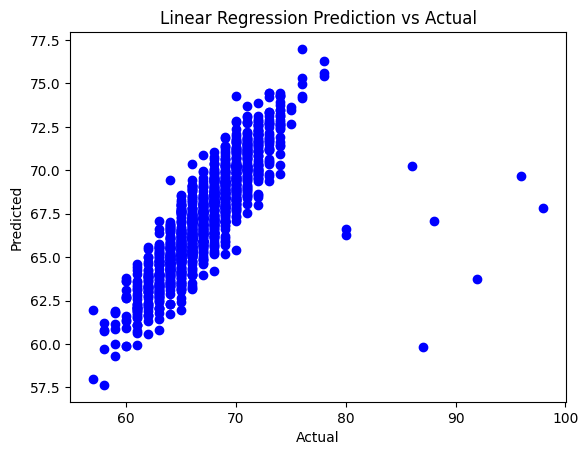

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

dataset_path = '/root/.cache/kagglehub/datasets/lainguyn123/student-performance-factors/versions/9'
data_files = os.path.join(dataset_path, 'StudentPerformanceFactors.csv')
data = pd.read_csv(data_files)

x = data[['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity']]
y = data[['Exam_Score']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=666)

model = LinearRegression()
model.fit(x_train, y_train)

y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

mse_training = mean_squared_error(y_train, y_pred_train)
print('Hasil Evaluasi MSE Training =', mse_training)

mse_testing = mean_squared_error(y_test, y_pred_test)
print('Hasil Evaluasi MSE Testing =', mse_testing)

plt.scatter(y_test, y_pred_test, color='blue')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression Prediction vs Actual')
plt.show()

#cross validation

Cross-Validation digunakan untuk mengevaluasi performa model secara lebih objektif. Caranya:<br>
1. Dataset dibagi menjadi beberapa bagian kecil (fold), Misalnya 5 atau 10 fold.
2. Model di-training di beberapa fold dan diuji di fold lainnya secara bergantian.
3. Hasil akurasi dari semua fold dirata-ratakan.
<br><br>
Tujuan:
- Mengurangi risiko hasil evaluasi yang terlalu bergantung pada satu pembagian data.
- Menilai stabilitas dan generalisasi model terhadap data baru.

cv = jumlah 'fold' pada cross-validation <br>
Semakin besar cv, evaluasi makin akurat tapi waktu komputasi lebih lama <br>
Umumnya digunakan nilai cv = 5 atau cv = 10.

In [ ]:

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np

model = LinearRegression()
scores = cross_val_score(model, x, y, cv=3, scoring='neg_mean_squared_error')
print("Hasil MSE per fold:", -scores)
print("Rata-rata MSE:", -np.mean(scores))

Hasil MSE per fold: [6.36408187 7.01130417 4.90617219]
Rata-rata MSE: 6.093852741353866


In [ ]:

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np

model = LinearRegression()
scores = cross_val_score(model, x, y, cv=57, scoring='neg_mean_squared_error')
print("Hasil MSE per fold:", -scores)
print("Rata-rata MSE:", -np.mean(scores))

Hasil MSE per fold: [10.41097865  7.59964854  1.97205376  5.75270629 15.97703474  4.91854178
  6.0263027  15.05579198  1.92796736 13.62531856  2.16949426  5.68671936
  1.93758263  9.6791446   1.93387764  5.17609449  4.62125316  4.44195021
  2.14731069  8.46120741 11.49355415  7.95335259  8.34784402  7.22452809
  2.00582765 10.37024689  7.73452392  8.06823173  1.92896408 12.31800263
 10.16355139  1.80664523  2.17902241  6.45082669  1.9877305   1.96744093
  9.5038887  16.92327397  1.94291655 13.38192743  4.99379545  8.66361498
  1.94188833  2.37230384  3.70859073  2.15707448  1.95362435  2.13348442
  2.20864214  2.32718711  1.67859256  9.58851887  2.35697475  2.10322877
  7.246508   10.09433616  8.5001995 ]
Rata-rata MSE: 6.093014785912457


In [ ]:

import kagglehub

path = kagglehub.dataset_download("ananthr1/weather-prediction")

print("Path to dataset files:", path)

100%|██████████| 11.5k/11.5k [00:00<00:00, 17.8MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/ananthr1/weather-prediction/versions/1


In [ ]:
import os

dataset_path = '/root/.cache/kagglehub/datasets/ananthr1/weather-prediction/versions/1'
print(os.listdir(dataset_path))

['seattle-weather.csv']


In [ ]:
import os
import pandas as pd

dataset_path = '/root/.cache/kagglehub/datasets/ananthr1/weather-prediction/versions/1'
data_files = os.path.join(dataset_path, 'seattle-weather.csv')

data = pd.read_csv(data_files)
data

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


from matplotlib import pyplot as plt
data['precipitation'].plot(kind='hist', bins=20, title='precipitation')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['temp_max'].plot(kind='hist', bins=20, title='temp_max')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['temp_min'].plot(kind='hist', bins=20, title='temp_min')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['wind'].plot(kind='hist', bins=20, title='wind')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('weather').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='precipitation', y='temp_max', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='temp_max', y='temp_min', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='temp_min', y='wind', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['precipitation']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('weather')):
  _plot_series(series, series_name, i)
  fig.legend(title='weather', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('precipitation')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['temp_max']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('weather')):
  _plot_series(series, series_name, i)
  fig.legend(title='weather', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('temp_max')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['temp_min']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('weather')):
  _plot_series(series, series_name, i)
  fig.legend(title='weather', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('temp_min')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['wind']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('weather')):
  _plot_series(series, series_name, i)
  fig.legend(title='weather', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('wind')

from matplotlib import pyplot as plt
data['precipitation'].plot(kind='line', figsize=(8, 4), title='precipitation')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['temp_max'].plot(kind='line', figsize=(8, 4), title='temp_max')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['temp_min'].plot(kind='line', figsize=(8, 4), title='temp_min')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['wind'].plot(kind='line', figsize=(8, 4), title='wind')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['weather'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='precipitation', y='weather', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['weather'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='temp_max', y='weather', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['weather'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='temp_min', y='weather', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['weather'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='wind', y='weather', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['weather_encoded'] = label_encoder.fit_transform(data['weather'])

In [ ]:
data

,date,precipitation,temp_max,temp_min,wind,weather,weather_encoded
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,0
1,2012-01-02,10.9,10.6,2.8,4.5,rain,2
2,2012-01-03,0.8,11.7,7.2,2.3,rain,2
3,2012-01-04,20.3,12.2,5.6,4.7,rain,2
4,2012-01-05,1.3,8.9,2.8,6.1,rain,2
...,...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain,2
1457,2015-12-28,1.5,5.0,1.7,1.3,rain,2
1458,2015-12-29,0.0,7.2,0.6,2.6,fog,1
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun,4


In [ ]:
x = data[['precipitation', 'temp_max', 'temp_min', 'wind']]
y = data['weather_encoded']

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import numpy as np

model = LogisticRegression()
scores = cross_val_score(model, x, y, cv=5, scoring='accuracy')

print("Akurasi per folds:", scores)
print("Rata-rata akurasi:", scores.mean())

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Akurasi per folds: [0.78498294 0.82534247 0.84246575 0.88013699 0.87328767]
Rata-rata akurasi: 0.8412431623731825


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:

data_filtered = data[data['weather'] == 'rain']
data_filtered

,date,precipitation,temp_max,temp_min,wind,weather,weather_encoded
1,2012-01-02,10.9,10.6,2.8,4.5,rain,2
2,2012-01-03,0.8,11.7,7.2,2.3,rain,2
3,2012-01-04,20.3,12.2,5.6,4.7,rain,2
4,2012-01-05,1.3,8.9,2.8,6.1,rain,2
5,2012-01-06,2.5,4.4,2.2,2.2,rain,2
...,...,...,...,...,...,...,...
1452,2015-12-23,6.1,5.0,2.8,7.6,rain,2
1453,2015-12-24,2.5,5.6,2.2,4.3,rain,2
1454,2015-12-25,5.8,5.0,2.2,1.5,rain,2
1456,2015-12-27,8.6,4.4,1.7,2.9,rain,2


In [ ]:
data_filtered = data[data['wind'] > 3]
data_filtered

,date,precipitation,temp_max,temp_min,wind,weather,weather_encoded
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,0
1,2012-01-02,10.9,10.6,2.8,4.5,rain,2
3,2012-01-04,20.3,12.2,5.6,4.7,rain,2
4,2012-01-05,1.3,8.9,2.8,6.1,rain,2
8,2012-01-09,4.3,9.4,5.0,3.4,rain,2
...,...,...,...,...,...,...,...
1451,2015-12-22,4.6,7.8,2.8,5.0,rain,2
1452,2015-12-23,6.1,5.0,2.8,7.6,rain,2
1453,2015-12-24,2.5,5.6,2.2,4.3,rain,2
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun,4


In [ ]:
data_filtered = data[(data['wind'] > 3) & (data['weather'] == 'rain')]
data_filtered

,date,precipitation,temp_max,temp_min,wind,weather,weather_encoded
1,2012-01-02,10.9,10.6,2.8,4.5,rain,2
3,2012-01-04,20.3,12.2,5.6,4.7,rain,2
4,2012-01-05,1.3,8.9,2.8,6.1,rain,2
8,2012-01-09,4.3,9.4,5.0,3.4,rain,2
9,2012-01-10,1.0,6.1,0.6,3.4,rain,2
...,...,...,...,...,...,...,...
1449,2015-12-20,4.3,7.8,4.4,6.7,rain,2
1450,2015-12-21,27.4,5.6,2.8,4.3,rain,2
1451,2015-12-22,4.6,7.8,2.8,5.0,rain,2
1452,2015-12-23,6.1,5.0,2.8,7.6,rain,2


In [ ]:
data_filtered = data[(data['wind'] > 3) & (data['wind'] <= 5) & (data['weather'] == 'rain')]
data_filtered

,date,precipitation,temp_max,temp_min,wind,weather,weather_encoded
1,2012-01-02,10.9,10.6,2.8,4.5,rain,2
3,2012-01-04,20.3,12.2,5.6,4.7,rain,2
8,2012-01-09,4.3,9.4,5.0,3.4,rain,2
9,2012-01-10,1.0,6.1,0.6,3.4,rain,2
21,2012-01-22,6.1,6.7,2.2,4.8,rain,2
...,...,...,...,...,...,...,...
1434,2015-12-05,15.7,10.0,6.1,4.0,rain,2
1436,2015-12-07,27.4,11.1,8.3,3.4,rain,2
1450,2015-12-21,27.4,5.6,2.8,4.3,rain,2
1451,2015-12-22,4.6,7.8,2.8,5.0,rain,2


In [ ]:
data_filtered = data[(data['weather'] == 'rain') | (data['weather'] == 'drizzle')]
data_filtered

,date,precipitation,temp_max,temp_min,wind,weather,weather_encoded
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,0
1,2012-01-02,10.9,10.6,2.8,4.5,rain,2
2,2012-01-03,0.8,11.7,7.2,2.3,rain,2
3,2012-01-04,20.3,12.2,5.6,4.7,rain,2
4,2012-01-05,1.3,8.9,2.8,6.1,rain,2
...,...,...,...,...,...,...,...
1452,2015-12-23,6.1,5.0,2.8,7.6,rain,2
1453,2015-12-24,2.5,5.6,2.2,4.3,rain,2
1454,2015-12-25,5.8,5.0,2.2,1.5,rain,2
1456,2015-12-27,8.6,4.4,1.7,2.9,rain,2


In [ ]:
import kagglehub

kagglehub.login()
path = kagglehub.dataset_download("evangower/premier-league-matches-19922022")
print("Path to dataset files:", path)

100%|██████████| 79.9k/79.9k [00:00<00:00, 504kB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/evangower/premier-league-matches-19922022/versions/2


In [ ]:
import os

dataset_path = '/root/.cache/kagglehub/datasets/evangower/premier-league-matches-19922022/versions/2'
files = os.listdir(dataset_path)
print("Nama File =", files)

Nama File = ['premier-league-matches.csv']


In [ ]:
import os
import pandas as pd

dataset_path = '/root/.cache/kagglehub/datasets/evangower/premier-league-matches-19922022/versions/2'
data_files = os.path.join(dataset_path, 'premier-league-matches.csv')

data = pd.read_csv(data_files)
data

,Season_End_Year,Wk,Date,Home,HomeGoals,AwayGoals,Away,FTR
0,1993,1,1992-08-15,Coventry City,2,1,Middlesbrough,H
1,1993,1,1992-08-15,Leeds United,2,1,Wimbledon,H
2,1993,1,1992-08-15,Sheffield Utd,2,1,Manchester Utd,H
3,1993,1,1992-08-15,Crystal Palace,3,3,Blackburn,D
4,1993,1,1992-08-15,Arsenal,2,4,Norwich City,A
...,...,...,...,...,...,...,...,...
12021,2023,38,2023-05-28,Everton,1,0,Bournemouth,H
12022,2023,38,2023-05-28,Leicester City,2,1,West Ham,H
12023,2023,38,2023-05-28,Aston Villa,2,1,Brighton,H
12024,2023,38,2023-05-28,Leeds United,1,4,Tottenham,A


from matplotlib import pyplot as plt
data['Season_End_Year'].plot(kind='hist', bins=20, title='Season_End_Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['Wk'].plot(kind='hist', bins=20, title='Wk')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['HomeGoals'].plot(kind='hist', bins=20, title='HomeGoals')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['AwayGoals'].plot(kind='hist', bins=20, title='AwayGoals')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('FTR').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='Season_End_Year', y='Wk', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='Wk', y='HomeGoals', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='HomeGoals', y='AwayGoals', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Season_End_Year']
  ys = series['Wk']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('Season_End_Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('FTR')):
  _plot_series(series, series_name, i)
  fig.legend(title='FTR', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Season_End_Year')
_ = plt.ylabel('Wk')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Season_End_Year']
  ys = series['HomeGoals']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('Season_End_Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('FTR')):
  _plot_series(series, series_name, i)
  fig.legend(title='FTR', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Season_End_Year')
_ = plt.ylabel('HomeGoals')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Season_End_Year']
  ys = series['AwayGoals']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('Season_End_Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('FTR')):
  _plot_series(series, series_name, i)
  fig.legend(title='FTR', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Season_End_Year')
_ = plt.ylabel('AwayGoals')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Season_End_Year']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Season_End_Year'}, axis=1)
              .sort_values('Season_End_Year', ascending=True))
  xs = counted['Season_End_Year']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('Season_End_Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('FTR')):
  _plot_series(series, series_name, i)
  fig.legend(title='FTR', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Season_End_Year')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
data['Season_End_Year'].plot(kind='line', figsize=(8, 4), title='Season_End_Year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['Wk'].plot(kind='line', figsize=(8, 4), title='Wk')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['HomeGoals'].plot(kind='line', figsize=(8, 4), title='HomeGoals')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['AwayGoals'].plot(kind='line', figsize=(8, 4), title='AwayGoals')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['FTR'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='Season_End_Year', y='FTR', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['FTR'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='Wk', y='FTR', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['FTR'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='HomeGoals', y='FTR', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['FTR'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='AwayGoals', y='FTR', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:

data2_chelsea_home = data[data['HomeGoals'] == 'Chelsea'].copy()
data2_chelsea_home['Home'] = 1
data2_chelsea_home

,Season_End_Year,Wk,Date,Home,HomeGoals,AwayGoals,Away,FTR


In [ ]:
data2_chelsea_home.describe()

,Season_End_Year,Wk,Home,HomeGoals,AwayGoals
count,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN
